In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from pydataset import data

# acquire
from env import host, user, password
import acquire
import wrangle

# custom visuals 
import viz_kmeans

# supress scientific notation
np.set_printoptions(suppress=True)

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler

<hr style="border:2px solid black"> </hr>

# Modeling Exercises

1. Clustering with the Iris Dataset

Using this lesson as a guide, perform clustering on the iris dataset.

- a. Choose features other than the ones used in the lesson.
- b. Visualize the results of your clustering.
- c. Use the elbow method to visually select a good value for k.
- d. Repeat the clustering, this time with 3 different features.


2. Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!


3. How does scaling impact the results of clustering?
- Compare k-means clustering results on scaled and unscaled data (you can choose any dataset for this exercise OR use the data/steps outlined in the bonus below). You can show how the resulting clusters differ either with descriptive statistics or visually.

<hr style="border:2px solid black"> </hr>

In [2]:
# import data
iris = data('iris')

#take a look at the data
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [3]:
# rename columns
iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species']

#make sure columns were renamed
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


<hr style="border:2px solid black"> </hr>

#### #1 Clustering with the Iris Dataset
- Using this lesson as a guide, perform clustering on the iris dataset.

##### a. Choose features other than the ones used in the lesson.

In [4]:
# define independent variables for k-means
X = iris[['sepal_width', 'petal_width']]

#take a look at X only
X.head()

,sepal_width,petal_width
1,3.5,0.2
2,3.0,0.2
3,3.2,0.2
4,3.1,0.2
5,3.6,0.2


In [5]:
#fit on X
scaler = StandardScaler().fit(X)

#transform on X
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

In [6]:
#take a look at X_scaled
X_scaled.head()

,sepal_width,petal_width
1,1.019004,-1.315444
2,-0.131979,-1.315444
3,0.328414,-1.315444
4,0.098217,-1.315444
5,1.249201,-1.315444


In [7]:
# sklearn implementation of KMeans

#define the thing/ choosing 3 clusters
kmeans = KMeans(n_clusters=3, random_state = 123)

# fit the thing on X_scaled
kmeans.fit(X_scaled)

# Use (predict using) the thing
#which clusters correspond to each datapoint
kmeans.predict(X_scaled)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2,
       2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2,
       2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2], dtype=int32)

In [8]:
# make a new column names cluster in iris and X_scaled dataframe
iris['cluster'] =kmeans.predict(X_scaled)
X_scaled['cluster'] = kmeans.predict(X_scaled)

______________________

##### b. Visualize the results of your clustering.

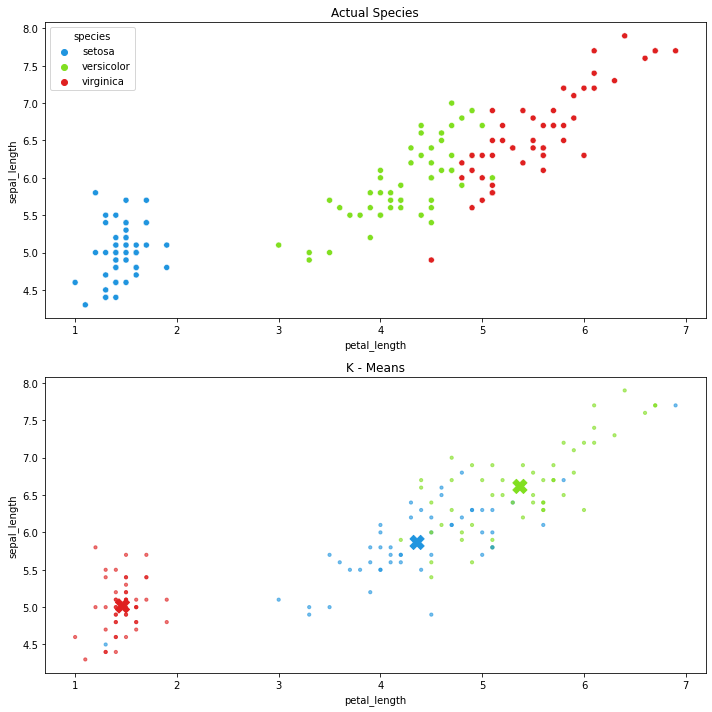

In [9]:
# Visualize the scatter plot for Actual vs predicted (K-Means)
viz_kmeans.viz_iris(iris, kmeans)

______________________

##### c. Use the elbow method to visually select a good value for k.

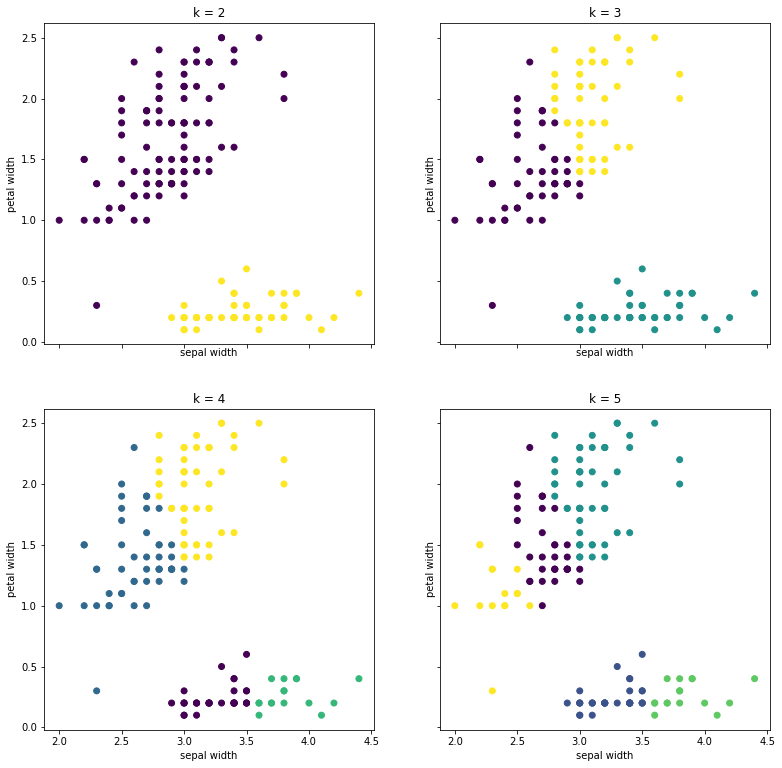

In [10]:
# What value of k is appropriate?
#plot it
fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

#k =2-5.. take a look at those different k values
for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X_scaled).predict(X_scaled)
    ax.scatter(X.sepal_width, X.petal_width, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='sepal width', ylabel='petal width')

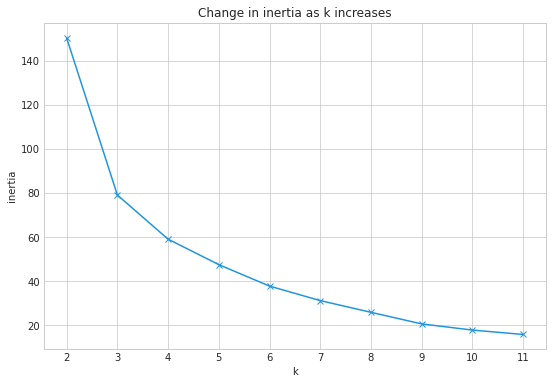

In [11]:
# lets plot inertia vs k
#lot inertia with k from 2-11
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')
    
#this is subjective.
#when the drop off stops, we would chose that K

______________________

##### d. Repeat the clustering, this time with 3 different features.

In [12]:
#identify X
X = iris[['petal_width', 'sepal_width', 'petal_length']]
from sklearn.preprocessing import StandardScaler

#fit the model
scaler = StandardScaler().fit(X)

#transform the model
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

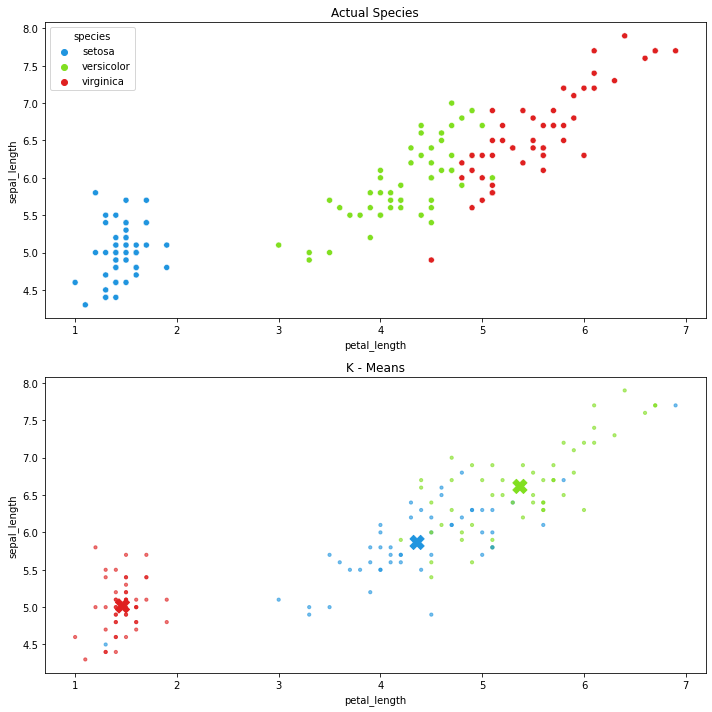

In [13]:
# Visualize the scatter plot for Actual vs predicted (K-Means)
viz_kmeans.viz_iris(iris, kmeans)

<hr style="border:2px solid black"> </hr>

#### #2 Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

In [14]:
#function in acquire.py
def get_connection(db_name):
    '''
    This function uses my info from my env file to
    create a connection url to access the Codeup db.
    '''
    from env import host, user, password
    return f'mysql+pymysql://{user}:{password}@{host}/{db_name}'

In [15]:
#function in acquire.py
def get_mall_customers():
    '''
    This function reads in the mall_customers data from the Codeup db
    returns: a pandas DataFrame 
    '''
    
    mall_query = '''
    SELECT *
    FROM customers
    '''
    return pd.read_sql(mall_query, get_connection('mall_customers'))

In [16]:
df = acquire.get_mall_customers()

In [17]:
df.head()

,gender,age,annual_income,spending_score
customer_id,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [18]:
# define independent variables for k-means
X = df[['age', 'annual_income']]

#take a look at X only
X.head()

,age,annual_income
customer_id,,
1,19,15
2,21,15
3,20,16
4,23,16
5,31,17


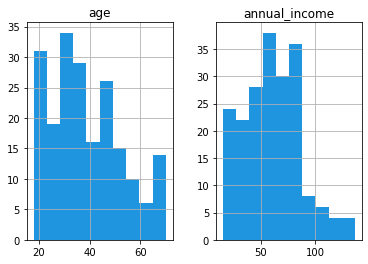

In [19]:
#take a look at distribution to decide what scaler to use
#these are basically normally distributed
X.hist()
plt.show()

In [20]:
#fit on X
scaler = MinMaxScaler().fit(X)

#transform on X
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

In [21]:
#take a look at X_scaled
X_scaled.head()

,age,annual_income
1,0.019231,0.000000
2,0.057692,0.000000
3,0.038462,0.008197
4,0.096154,0.008197
5,0.250000,0.016393


In [22]:
# sklearn implementation of KMeans

#define the thing/ choosing 3 clusters
kmeans = KMeans(n_clusters=3, random_state = 123)

# fit the thing on X_scaled
kmeans.fit(X_scaled)

# Use (predict using) the thing
#which clusters correspond to each datapoint
kmeans.predict(X_scaled)

array([0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0,
       2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 1, 0, 2, 2, 1, 2, 2, 0, 2, 2, 0,
       1, 2, 2, 0, 2, 1, 1, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2,
       2, 0, 1, 0, 0, 0, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [23]:
# make a new column names cluster in iris and X_scaled dataframe
df['cluster'] =kmeans.predict(X_scaled)
X_scaled['cluster'] = kmeans.predict(X_scaled)

In [24]:
# lets look at sample of 15 randomly selected rows in iris dataset
df.sample(15)
#this shows you in 'cluster' column which cluster the computer believes it belongs to

,gender,age,annual_income,spending_score,cluster
customer_id,,,,,
121,Male,27,67,56,1
171,Male,40,87,13,1
105,Male,49,62,56,2
131,Male,47,71,9,2
17,Female,35,21,35,0
141,Female,57,75,5,2
40,Female,20,37,75,0
25,Female,54,28,14,2
119,Female,51,67,43,2


In [25]:
#Cluster Centers aka centroids. 
#The output is scaled!! Not original units
kmeans.cluster_centers_

array([[0.14878543, 0.18550475],
       [0.31098178, 0.56794651],
       [0.71756602, 0.3126988 ]])

In [26]:
#change the cluster column to a string to plot it better
df['cluster'] = 'cluster_' + df.cluster.astype(str)
df.head()

,gender,age,annual_income,spending_score,cluster
customer_id,,,,,
1,Male,19,15,39,cluster_0
2,Male,21,15,81,cluster_0
3,Female,20,16,6,cluster_0
4,Female,23,16,77,cluster_0
5,Female,31,17,40,cluster_0


In [27]:
# DataFrame of unscaled Centriods
#group by clusters. mean of age and income.
centroids = df.groupby('cluster')['age', 'annual_income'].mean()
centroids

#this will correspond with scatterplot- unscaled data

,age,annual_income
cluster,,
cluster_0,25.736842,37.631579
cluster_1,34.171053,84.289474
cluster_2,55.313433,53.149254


In [28]:
# Make a dataframe of scaled centroids
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids_scaled

,age,annual_income
0,0.148785,0.185505
1,0.310982,0.567947
2,0.717566,0.312699


## Determine which K is best

In [29]:
#identify X
X = df[['age', 'annual_income']]

#fit the model
scaler = StandardScaler().fit(X)

#transform the model
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

In [30]:
#with k of 2 the inertia is 250
k =2 

kmeans = KMeans(n_clusters= k)
kmeans.fit(X_scaled)
kmeans.inertia_

250.58811570754705

In [31]:
#with k of 3 the inertia is 132
#very large drop off, nearly half
k =3 

kmeans = KMeans(n_clusters= k)
kmeans.fit(X_scaled)
kmeans.inertia_

132.8553042122192

In [32]:
#with k of 4 the inertia is 103
#still a large drop off but not AS much
k =4 

kmeans = KMeans(n_clusters= k)
kmeans.fit(X_scaled)
kmeans.inertia_

103.05151849277247

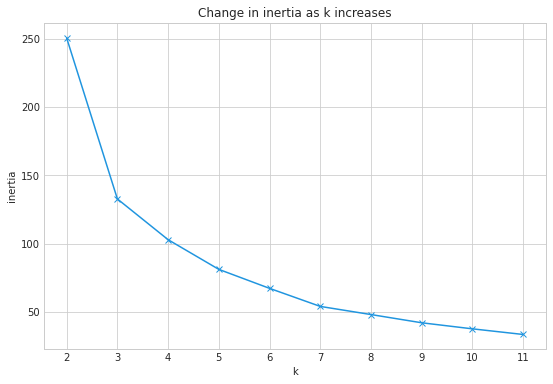

In [33]:
# lets plot inertia vs k
#lot inertia with k from 2-11
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')
    
#this is subjective.
#when the drop off stopswe would chose that K

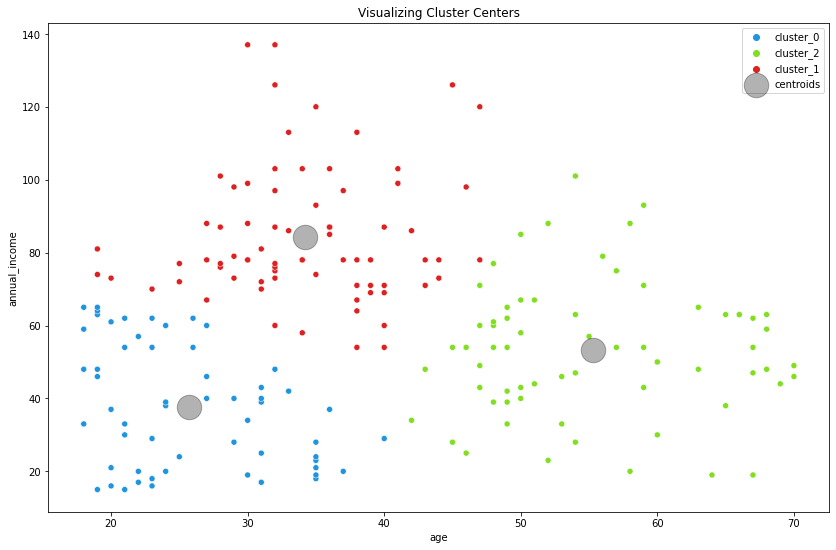

In [34]:
# lets visualize the clusters along with the centers on scaled data.
plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster
sns.scatterplot(x='age', y='annual_income', data=df, hue = 'cluster')

# plot cluster centers (centroids)
#unscaled data
centroids.plot.scatter(x='age', y='annual_income', ax=plt.gca(), s=600, color='k', alpha = 0.3, label='centroids')

plt.title('Visualizing Cluster Centers')
plt.legend();

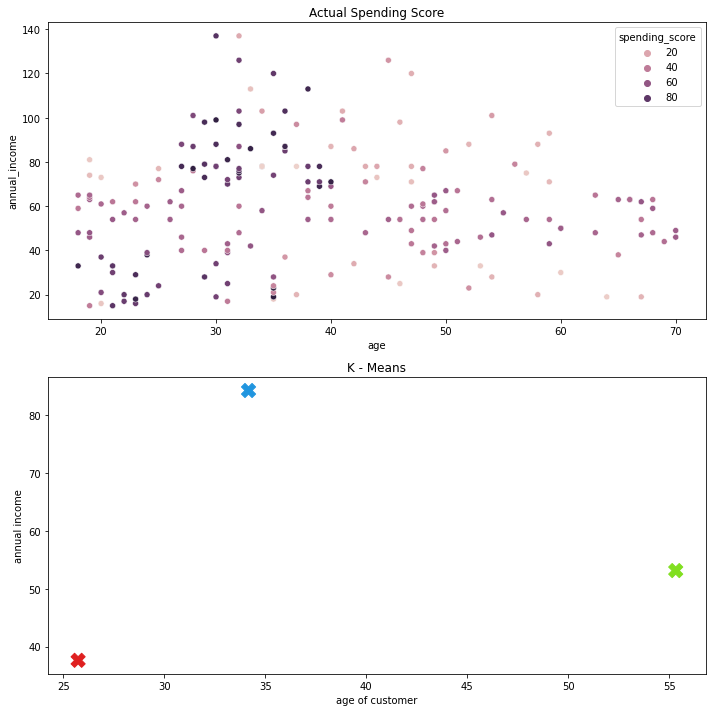

In [35]:
# Visualize the scatter plot for Actual vs predicted (K-Means)
viz_kmeans.viz_mall_customers(df, kmeans)

#### Takeaways:
- k = 3 appears to be the best choice

<hr style="border:2px solid black"> </hr>

### #3 How does scaling impact the results of clustering?
- Compare k-means clustering results on scaled and unscaled data (you can choose any dataset for this exercise OR use the data/steps outlined in the bonus below). You can show how the resulting clusters differ either with descriptive statistics or visually.

- b) Visualize the data and guess the number and shape of the clusters.
- c) Implement the KMeans algorithm on unscaled data and visualize the clusters.
- d) Repeat the step above but with scaled data. 
- c) Write down the takeaways from this exercise.

__________________

In [36]:
# import data
mpg = data('mpg')

#take a look at the data
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [37]:
summary = wrangle.summarize(mpg)

Dataframe head: 
  manufacturer model  displ  year  cyl       trans drv  cty  hwy fl    class
1         audi    a4    1.8  1999    4    auto(l5)   f   18   29  p  compact
2         audi    a4    1.8  1999    4  manual(m5)   f   21   29  p  compact
3         audi    a4    2.0  2008    4  manual(m6)   f   20   31  p  compact
Dataframe info: 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    ob

In [38]:
# define independent variables for k-means
X = mpg[['cty', 'hwy']]

#take a look at X only
X.head()

,cty,hwy
1,18,29
2,21,29
3,20,31
4,21,30
5,16,26


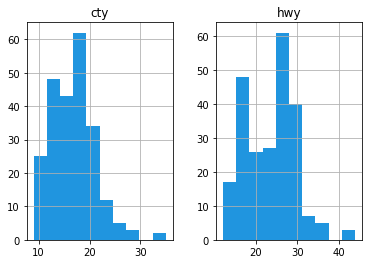

In [39]:
#take a look at distribution to decide what scaler to use
#these are basically normal
X.hist()
plt.show()

__________________

In [40]:
# Scale the X
from sklearn.preprocessing import StandardScaler

#fit on X
scaler = StandardScaler().fit(X)

#transform on X
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

In [41]:
# sklearn implementation of KMeans

#define the thing/ choosing 3 clusters
kmeans = KMeans(n_clusters=3, random_state = 123)

# fit the thing on X_scaled
kmeans.fit(X_scaled)

# Use (predict using) the thing
#which clusters correspond to each datapoint
kmeans.predict(X_scaled)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [42]:
# make a new column names cluster in iris and X_scaled dataframe
mpg['cluster'] =kmeans.predict(X_scaled)
X_scaled['cluster'] = kmeans.predict(X_scaled)

In [43]:
# DataFrame of unscaled Centriods
#group by clusters. mean of sepal and petal length.
centroids = mpg.groupby('cluster')['cty', 'hwy'].mean()
centroids

#this will correspond with scatterplot- unscaled data

,cty,hwy
cluster,,
0,18.528455,26.471545
1,12.968085,17.361702
2,26.294118,35.117647


In [44]:
#change the cluster column to a string to plot it better
mpg['cluster'] = 'cluster_' +mpg.cluster.astype(str)
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,cluster
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,cluster_0
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,cluster_0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,cluster_0
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,cluster_0
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,cluster_0


<hr style="border:2px solid black"> </hr>

##### b) Visualize the data and guess the number and shape of the clusters.

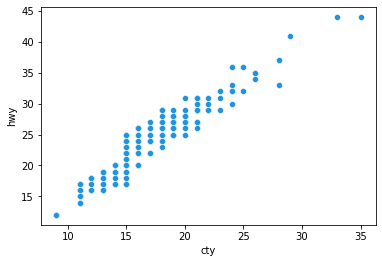

In [45]:
sns.scatterplot(x='cty', y='hwy', data=mpg)
plt.show()

<hr style="border:2px solid black"> </hr>

##### c) Implement the KMeans algorithm on unscaled data and visualize the clusters.

## Unscaled data

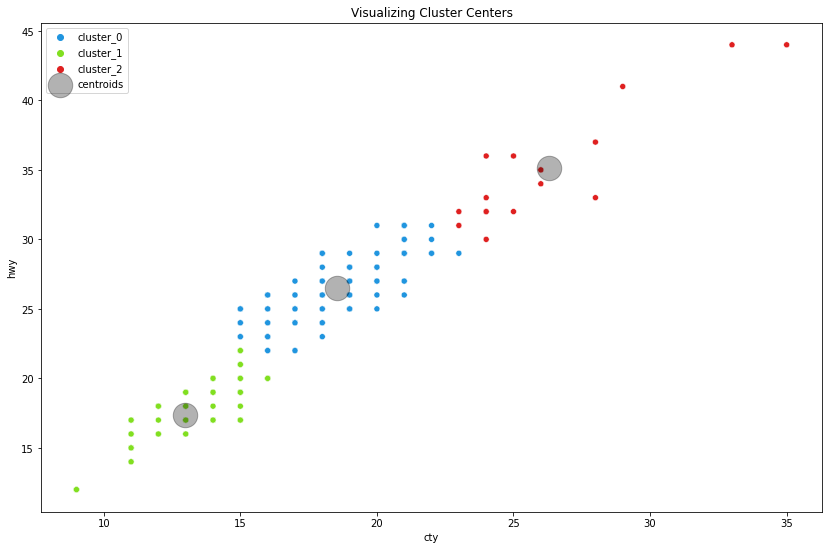

In [46]:
# lets visualize the clusters along with the centers on scaled data.
plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster
sns.scatterplot(x='cty', y='hwy', data=mpg, hue = 'cluster')

# plot cluster centers (centroids)
#unscaled data
centroids.plot.scatter(x='cty', y='hwy', ax=plt.gca(), s=600, color='k', alpha = 0.3, label='centroids')

plt.title('Visualizing Cluster Centers')
plt.legend();

<hr style="border:2px solid black"> </hr>

##### d) Repeat the step above but with scaled data.

In [47]:
# Make a dataframe of scaled centroids
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids_scaled

,cty,hwy
0,0.393111,0.510169
1,-0.916184,-1.022983
2,2.221685,1.965274


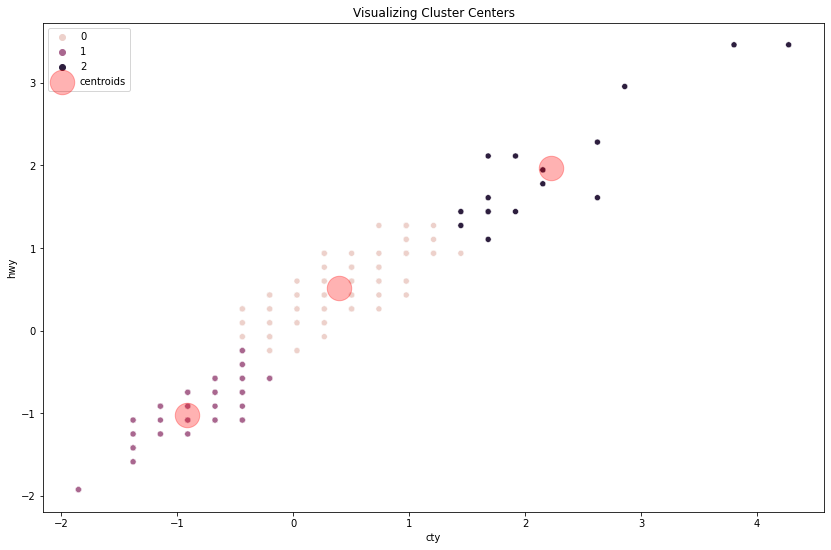

In [48]:
# lets visualize the clusters along with the centers on scaled data.
plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster
sns.scatterplot(x='cty', y='hwy', data=X_scaled, hue = 'cluster')

# plot cluster centers (centroids)
#scaled data
centroids_scaled.plot.scatter(x='cty', y='hwy', ax=plt.gca(), s=600, color='red', alpha = 0.3, label='centroids')

plt.title('Visualizing Cluster Centers')
plt.legend();

<hr style="border:2px solid black"> </hr>

### Determine which K to use

In [49]:
#identify X
X = mpg[['hwy','cty']]
from sklearn.preprocessing import StandardScaler

#fit the model
scaler = StandardScaler().fit(X)

#transform the model
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

In [50]:
#with k of 2 the inertia is 167
k =2 

kmeans = KMeans(n_clusters= k)
kmeans.fit(X_scaled)
kmeans.inertia_

167.58424671840558

In [51]:
#with k of 3 the inertia is 90
#very large drop off
k =3 

kmeans = KMeans(n_clusters= k)
kmeans.fit(X_scaled)
kmeans.inertia_

90.13599605641669

In [52]:
#with k of 4 the inertia is 59
#still a large drop off but not AS much
k =4 

kmeans = KMeans(n_clusters= k)
kmeans.fit(X_scaled)
kmeans.inertia_

59.550623780455

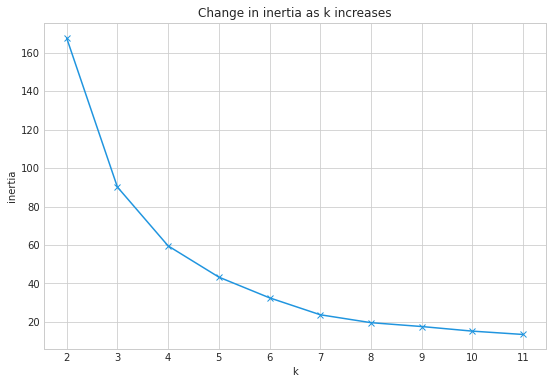

In [53]:
#lets plot inertia vs k
#lot inertia with k from 2-11
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')
    
#this is subjective.
#when the drop off stops we would chose that K

<hr style="border:2px solid black"> </hr>

##### e) Write down the takeaways from this exercise.

In [54]:
#k=3 appears to be the best option
#scaled data appears to have similarly placed centroids as unscaled data

<hr style="border:3px solid red"> </hr>

### Bonus
- a) Read in the data from this google sheet: https://docs.google.com/spreadsheets/d/1j5EgXVTR5ikUj3G5ZCQmkq6ziz_gvtASGAdw23-5_6M/edit?usp=sharing
- b) Visualize the data and guess the number and shape of the clusters.
- c) Implement the KMeans algorithm on unscaled data and visualize the clusters.
- d) Repeat the step above but with scaled data. 
- e) Write down the takeaways from this exercise.

In [55]:
#import csv into pandas
cluster_df = pd.read_csv('cluster_data.csv')

In [56]:
#take a look at the data with summarize function from wrangle.py
summary = wrangle.summarize(cluster_df)

Dataframe head: 
          x         y
0 -3.641747  0.121540
1 -7.620447  1.810897
2 -6.505373  0.068072
Dataframe info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       800 non-null    float64
 1   y       800 non-null    float64
dtypes: float64(2)
memory usage: 12.6 KB
None
DataFrame Description
                x           y
count  800.000000  800.000000
mean     0.508449    2.973206
std      9.906209    3.156376
min    -30.572062   -3.146259
25%     -6.068600   -0.047636
50%      0.581809    3.040642
75%      7.579269    5.996474
max     29.489457    8.817347
Dataframe value counts: 
(-30.633000000000003, -24.566]      4
(-24.566, -18.56]                  17
(-18.56, -12.554]                  57
(-12.554, -6.547]                 111
(-6.547, -0.541]                  177
(-0.541, 5.465]                   170
(5.465, 11.471]                   1

________________

##### b) Visualize the data and guess the number and shape of the clusters.

In [57]:
# define independent variables for k-means
X = cluster_df[['x']]

#take a look at X only
X.head()

,x
0,-3.641747
1,-7.620447
2,-6.505373
3,7.730963
4,17.283668


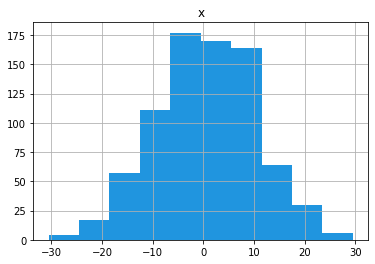

In [58]:
#take a look at distribution to decide what scaler to use
#these is normal
X.hist()
plt.show()

In [59]:
#fit on X
scaler = StandardScaler().fit(X)

#transform on X
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

In [60]:
# sklearn implementation of KMeans

#define the thing/ choosing 3 clusters
kmeans = KMeans(n_clusters=3, random_state = 123)

# fit the thing on X_scaled
kmeans.fit(X_scaled)

# Use (predict using) the thing
#which clusters correspond to each datapoint
kmeans.predict(X_scaled)

array([2, 2, 2, 0, 0, 2, 2, 2, 1, 0, 2, 1, 0, 2, 2, 0, 0, 2, 0, 1, 2, 0,
       1, 0, 0, 0, 0, 2, 2, 1, 0, 0, 1, 0, 2, 2, 2, 2, 0, 2, 2, 1, 0, 0,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 2,
       2, 2, 1, 0, 0, 1, 1, 2, 2, 0, 2, 2, 1, 2, 1, 2, 0, 0, 2, 1, 2, 0,
       1, 2, 1, 1, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       1, 1, 0, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 1, 2, 0, 2, 0, 1, 1,
       2, 0, 2, 0, 2, 0, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1, 0, 0, 0, 1, 2,
       0, 2, 0, 0, 1, 0, 0, 2, 0, 0, 1, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2,
       2, 2, 2, 2, 0, 1, 0, 2, 2, 0, 1, 2, 0, 0, 0, 0, 2, 2, 0, 2, 2, 2,
       2, 0, 2, 1, 2, 0, 0, 2, 2, 0, 0, 2, 1, 2, 2, 2, 2, 0, 1, 2, 1, 0,
       2, 1, 0, 0, 1, 1, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 1, 2,
       0, 0, 1, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 0, 0, 2,
       2, 0, 2, 0, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 2, 1, 2, 1, 2, 2, 1, 2,
       2, 2, 0, 2, 0, 2, 1, 0, 2, 2, 0, 1, 1, 2, 0,

________________

##### c) Implement the KMeans algorithm on unscaled data and visualize the clusters.

________________

##### d) Repeat the step above but with scaled data.

________________

##### e) Write down the takeaways from this exercise.